## Assignment 2
### Devon Richtsmeier

### Question 3

3. Use your data and find the best hyperparameters of a KNN model, K and p, (for a regression) using GridSearch.

### Import the necessary Python packages including:
* numpy for the array capabilities
* pandas for data visualization and manipulation
* matplotlib for plotting
* scikit-learn for its data processing, regressors, feature extraction
* seaborn just to have a nice plotting surface

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Use seaborn to set the plotting style
sns.set_style('whitegrid')

print('Packages imported.')

Packages imported.


### Load the data and display the first 5 rows. Additionally, look at the column information to see if cleaning is necessary

In [2]:
# Load the melanoma data using pandas
skin_data = pd.read_csv('skin_cancer.csv')

# Display the first 5 rows of data
skin_data.head(n=5)


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [3]:
# Display the info about each of the columns to see if cleaning is necessary
skin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


### Look at the histograms of the data before normalization

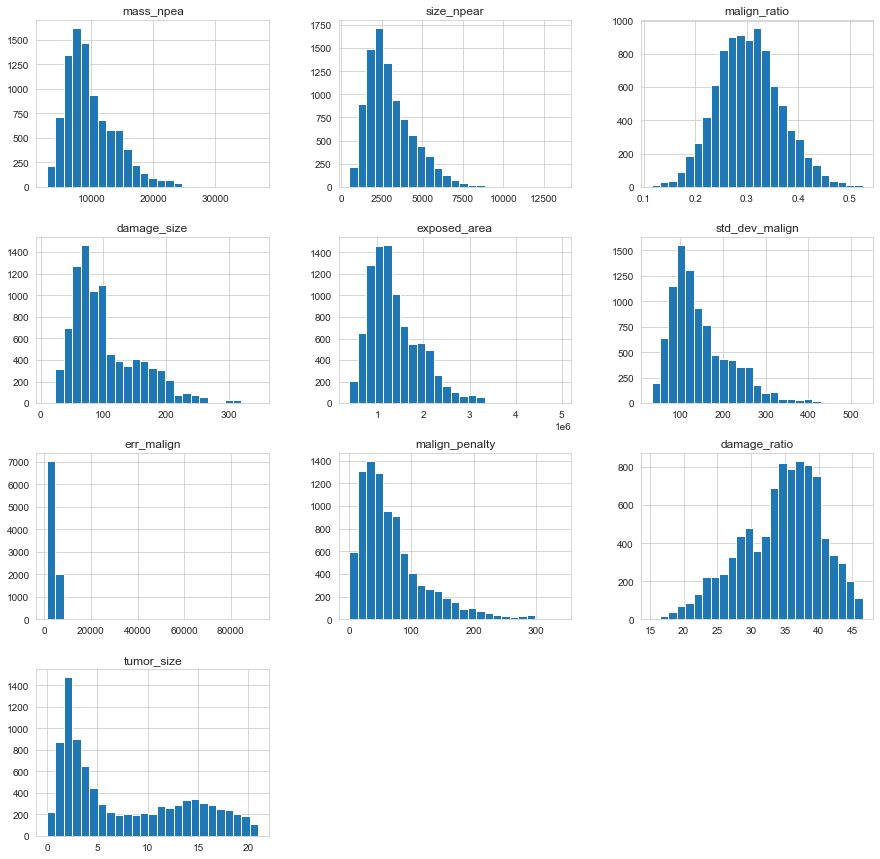

In [4]:
# All data histograms so that we can look at the distributions before and after normalization

skin_data.hist(bins=25, figsize=(15, 15))
plt.show()

### Set the input and target data
Target data is 'tumor_size' or the size of the skin cancer tumor

Also double check the size of the input and target arrays are the same

In [5]:
# Set the input and target data
input_skin = skin_data[['mass_npea', 'size_npear', 'malign_ratio', 'damage_size', 'exposed_area', 'std_dev_malign', 
                        'err_malign', 'malign_penalty', 'damage_ratio']].values
target_skin = skin_data['tumor_size'].values

# Print the shapes of the data to make sure the size is the same (number of rows)
print(f'Input shape: {np.shape(input_skin)}')
print(f'Target shape: {np.shape(target_skin)}')

Input shape: (9146, 9)
Target shape: (9146,)


### Separate the input and target randomly into a training and validation set
### Validation test is 25% of the 9,146 rows

In [6]:
# Training input, validation input, training target, validation target
# Separately
input_tr, input_va, target_tr, target_va = train_test_split(input_skin, target_skin, test_size=0.25)

# Print the new sizes of the various training and validation sets
print(f'Training set shapes: {np.shape(input_tr)}, {np.shape(target_tr)}')
print(f'Validation set shapes: {np.shape(input_va)}, {np.shape(target_va)}')

Training set shapes: (6859, 9), (6859,)
Validation set shapes: (2287, 9), (2287,)


### Check that the shapes of the distributions of the training and validation sets are roughly the same


Text(0.5, 1.0, 'Validation set')

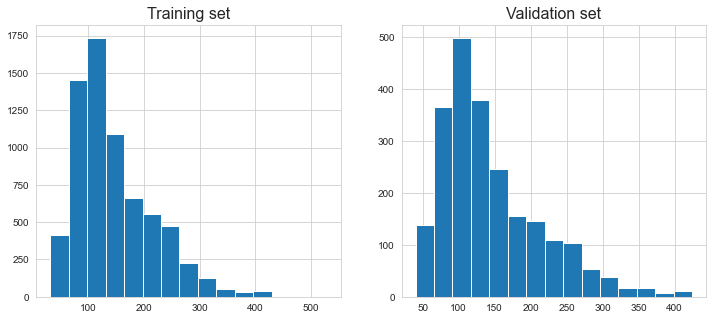

In [7]:
# The column of the input data to examine
col_num = 5

# The figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(input_tr[:, col_num], bins=15)
ax[0].set_title('Training set', fontsize=16)

ax[1].hist(input_va[:, col_num], bins=15)
ax[1].set_title('Validation set', fontsize=16)

## Now normalize the data 

In [8]:
# Apply a standard normalization to the input data
stnd_scaler = StandardScaler().fit(input_tr)
input_tr_norm = stnd_scaler.transform(input_tr)  # Normalize training data
input_va_norm = stnd_scaler.transform(input_va)  # Normalize the validation data

### Look at the histograms of the data after normalization

Text(0.5, 1.0, 'Validation set')

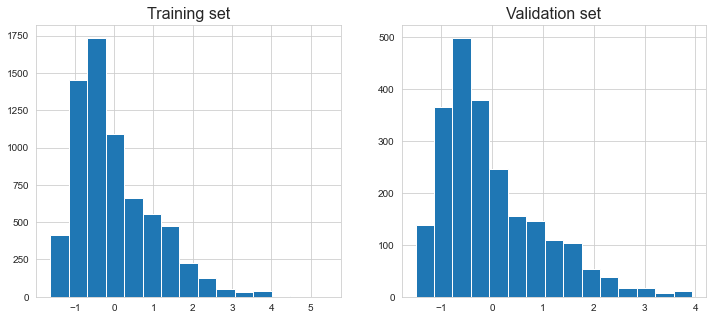

In [9]:
# Examine the input data after normalization for both the training and validation sets

# The column of the input data to examine
col_num = 5

# The figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(input_tr_norm[:, col_num], bins=15)
ax[0].set_title('Training set', fontsize=16)

ax[1].hist(input_va_norm[:, col_num], bins=15)
ax[1].set_title('Validation set', fontsize=16)

### Now we'll looks for the best hyperparameters (k and p) using the GridSearch function from scikit-learn.

In [10]:
# Import GridSearch
from sklearn.model_selection import GridSearchCV

# Set the parameters to go over to be the same as we looked at above
param_grid = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 50], 'p': [1, 2]}]

# Again set up the regressor
reg = KNeighborsRegressor()

# Perform the GridSearch
grid_search = GridSearchCV(reg, param_grid, cv=5)

# And fit
grid_search.fit(input_tr_norm, target_tr)

# Print the best parameters
best_params = grid_search.best_params_
print(f'The best parameters from GridSearchCV are: {best_params}')

The best parameters from GridSearchCV are: {'n_neighbors': 7, 'p': 1}


### Use best parameters found above for the K neighbors regressor

Text(25, 0.5, '$\\mu=0.8548$\n$\\mathrm{med}=0.0473$\n$\\sigma=4.3266$')

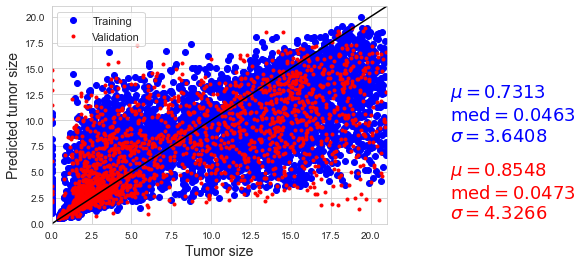

In [13]:
# The KNN regressor, with the best params found above
reg = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], p=best_params['p'])

# Fit the model with un-normalized training set
reg.fit(input_tr_norm, target_tr) 

# Use the regressor to prediction the results for training and validation sets
target_tr_pred = reg.predict(input_tr_norm)  
target_va_pred = reg.predict(input_va_norm)

# Set up the figure to plot the results for both the training and validations set
fig = plt.figure(figsize=(6, 4))
plt.plot(target_tr, target_tr_pred, 'ob') # Training actual vs. predicted in blue
plt.plot(target_va, target_va_pred, '.r')  # Validation actual vs. predicted in red

# Plot a line of slope 1 and intercept 0 to see how well the data agrees with the prediction
plt.plot(np.arange(0, 25, .1),  np.arange(0, 25, .1), '-k')
plt.xlabel('Tumor size', fontsize=14)
plt.ylabel('Predicted tumor size', fontsize=14)
plt.legend(['Training', 'Validation'], fontsize=11)
plt.xlim([0,21])
plt.ylim([0,21])

# Calculate the statistical information for the predicted sets
mu_tr = np.mean(target_tr - target_tr_pred)
median_tr = np.median(target_tr - target_tr_pred)
sigma_tr = np.std(target_tr - target_tr_pred)

mu_va = np.mean(target_va - target_va_pred)
median_va = np.median(target_va - target_va_pred)
sigma_va = np.std(target_va - target_va_pred)

# Add the statistical information regarding training and validation predictions to the side of the plot
text_tr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_tr, median_tr, sigma_tr)
text_va = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_va, median_va, sigma_va)
plt.text(25, 8, text_tr, color='b', fontsize=18)
plt.text(25, 0.5, text_va, color='r', fontsize=18)

### Examine a few metrics including the difference between the predicted and target values and how they are distributed (immediately below) and the systematic error (2 cells down).

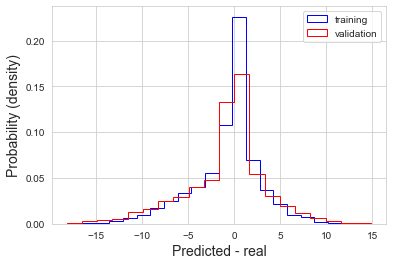

In [14]:
# If the size validation set and training set are different, 
# it would be better to normalize the distributions for a better comparison.
plt.hist(target_tr_pred - target_tr, 20, color='b', histtype='step', density=True, label='training')
plt.hist(target_va_pred - target_va, 20, color='r', histtype='step', density=True, label='validation')
plt.xlabel('Predicted - real', fontsize=14)
plt.ylabel('Probability (density)', fontsize=14)
plt.legend()

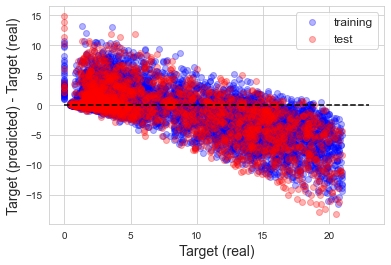

In [15]:
# Inspecting systematic errors for the training set and validation set together 
plt.scatter(target_tr, target_tr_pred - target_tr, label='training', color='b', alpha=.3)
plt.scatter(target_va, target_va_pred - target_va, label='test', color='r', alpha=.3)
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([0,23], [0,0], '--k')
plt.legend(fontsize=12)